In [ ]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import xlsxwriter

%load_ext sql

In [ ]:
conn = sql3.connect('data/prtr_en.db')

In [ ]:
cursor = conn.execute('')

In [ ]:
df = pd.read_excel("issues\eprtr2lps_issues.xlsx", index_col = 0)
pd.set_option('display.max_colwidth', 80)
pd.DataFrame(df)
df = df.fillna("")
df = df.style.set_properties(**{'text-align': 'left'})
df

### Quality check #1 - Total lps emissions < national total

In [ ]:
''' \
Steps: \
1. to sum all the lps emissions (for each substance_name) \
2. compare it with the national total amount of each substance with values from trend-tables \
'''

In [ ]:
'''
substance_names:
Nitrogen oxides (NOx/NO2)
Non-methane volatile organic compounds (NMVOC)
Sulphur oxides (SOx/SO2)
Ammonia (NH3)
Particulate matter (PM2.5)
Particulate matter (PM10)
Carbon monoxide (CO)
Lead and compounds (as Pb)
Cadmium and compounds (as Cd)
Mercury and compounds (as Hg)
PCDD + PCDF (dioxins + furans)(as Teq)
Polycyclic aromatic hydrocarbons (PAHs)
Hexachlorobenzene (HCB)
Polychlorinated biphenyls (PCBs)
'''

In [ ]:
year = '2018'

In [ ]:
substance_name = 'Polychlorinated biphenyls (PCBs)'

In [ ]:
%%sql sqlite:///data/prtr_en.db test_1_PCBs <<
    SELECT substance_name, SUM(annual_load)/1000000 AS "SUM(in kt/a)" FROM releases
    WHERE substance_name = :substance_name AND year = :year

In [ ]:
test_1_NOx

In [ ]:
test_1_NMVOC

In [ ]:
test_1_SOx

In [ ]:
test_1_NH3

In [ ]:
test_1_PM2_5

In [ ]:
test_1_PM10

In [ ]:
test_1_CO

In [ ]:
test_1_Pb

In [ ]:
test_1_Cd

In [ ]:
test_1_Hg

In [ ]:
test_1_Teq

In [ ]:
test_1_PAHs

In [ ]:
test_1_HCB

In [ ]:
test_1_PCBs

In [ ]:
df_1 = test_1_NOx.DataFrame()
df_2 = test_1_NMVOC.DataFrame()
df_3 = test_1_SOx.DataFrame()
df_4 = test_1_NH3.DataFrame()
df_5 = test_1_PM2_5.DataFrame()
df_6 = test_1_PM10.DataFrame()
df_7 = test_1_CO.DataFrame()
df_8 = test_1_Pb.DataFrame()
df_9 = test_1_Cd.DataFrame()
df_10 = test_1_Hg.DataFrame()
df_11 = test_1_Teq.DataFrame()
df_12 = test_1_PAHs.DataFrame()
df_13 = test_1_HCB.DataFrame()
df_14 = test_1_PCBs.DataFrame()

In [ ]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14])
df

In [ ]:
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.drop([4,10,13])
df

In [ ]:
df.to_csv("quality_check_1_2018.csv")

### Quality check #3 - unit mistakes 

In [ ]:
'''
With the describe function you get position parameters for the box plot diagram 
and so upper outliers and lower outliers can be determined. 
This can be done for every substance_name, for every year and for every business_sector
'''

In [ ]:
'''
substance_names:

Nitrogen oxides (NOx/NO2)
Non-methane volatile organic compounds (NMVOC)
Sulphur oxides (SOx/SO2)
Ammonia (NH3)
Particulate matter (PM2.5)
Particulate matter (PM10)
Carbon monoxide (CO)
Lead and compounds (as Pb)
Cadmium and compounds (as Cd)
Mercury and compounds (as Hg)
PCDD + PCDF (dioxins + furans)(as Teq)
Polycyclic aromatic hydrocarbons (PAHs)
Hexachlorobenzene (HCB)
Polychlorinated biphenyls (PCBs)
'''

In [ ]:
'''
business_sectors:

Chemical industry
Energy sector
Food industry
Intensive livestock production and aquaculture
Metal industry
Mineral industry
Other industry
Paper- and wood industry
Waste and waste water management
'''

In [ ]:
year = '2018'

In [ ]:
substance_name = 'Particulate matter (PM10)'

In [ ]:
business_sector = 'Chemical industry'

In [ ]:
%%sql sqlite:///data/prtr_en.db test_3_PM10 <<
    SELECT substance_name, annual_load/1000000 AS "annual_load/1000000" FROM releases, activities
    WHERE substance_name = :substance_name AND releases.year = :year AND business_sector = :business_sector 
    AND compartment = "Air" 
    ORDER BY annual_load

In [ ]:
test_3_NOx = test_3_NOx.DataFrame()
test_3_NOx

In [ ]:
test_3_NOx.describe()

In [ ]:
# interquartile range: 75% value - 25% value

In [ ]:
# example with NOx:

In [ ]:
4.990000e-01 - 1.400000e-01

In [ ]:
# lower outlier: 25% - 1,5 * interquartile range

In [ ]:
1.400000e-01 - 1.5*0.359

In [ ]:
# upper outliers: 75% + 1,5 * interquartile range

In [ ]:
4.990000e-01 + 1.5*0.359

In [ ]:
test_3_NOx.plot()

In [ ]:
test_3_NOx.boxplot()

In [ ]:
%%sql sqlite:///data/prtr_en.db NOx_outlier <<
    SELECT substance_name, annual_load/1000000 AS "annual_load/1000000" FROM releases, activities
    WHERE (substance_name = 'Nitrogen oxides (NOx/NO2)' AND annual_load/1000000 > 1.0375) AND releases.year = 2018 AND business_sector = 'Chemical industry'
    AND compartment = "Air" 
    GROUP BY annual_load/1000000
    ORDER BY annual_load/1000000

In [ ]:
NOx_outlier

In [ ]:
test_3_NMVOC = test_3_NMVOC.DataFrame()
test_3_NMVOC

In [ ]:
test_3_NMVOC.describe()

In [ ]:
NMVOC_outlier

In [ ]:
test_3_NMVOC.plot()

In [ ]:
test_3_NMVOC.boxplot()

In [ ]:
test_3_SOx = test_3_SOx.DataFrame()
test_3_SOx

In [ ]:
test_3_SOx.describe()

In [ ]:
SOx_outlier

In [ ]:
test_3_SOx.plot()

In [ ]:
test_3_SOx.boxplot()

In [ ]:
test_3_NH3 = test_3_NH3.DataFrame()
test_3_NH3

In [ ]:
test_3_NH3.describe()

In [ ]:
test_3_NH3.plot()

In [ ]:
test_3_NH3.boxplot()

In [ ]:
test_3_PM2_5 = test_3_PM2_5.DataFrame()
test_3_PM2_5

In [ ]:
test_3_PM10 = test_3_PM10.DataFrame()
test_3_PM10

In [ ]:
test_3_PM10.describe()

In [ ]:
test_3_PM10.plot()

In [ ]:
test_3_PM10.boxplot()

In [ ]:
test_3_CO = test_3_CO.DataFrame()
test_3_CO

In [ ]:
test_3_CO.describe()

In [ ]:
test_3_CO.plot()

In [ ]:
test_3_CO.boxplot()

In [ ]:
test_3_Pb = test_3_Pb.DataFrame()
test_3_Pb

In [ ]:
test_3_Pb.describe()

In [ ]:
test_3_Pb.plot()

In [ ]:
test_3_Pb.boxplot()

In [ ]:
test_3_Cd = test_3_Cd.DataFrame()
test_3_Cd

In [ ]:
test_3_Cd.describe()

In [ ]:
test_3_Cd.plot()

In [ ]:
test_3_Cd.boxplot()

In [ ]:
test_3_Hg = test_3_Hg.DataFrame()
test_3_Hg

In [ ]:
test_3_Hg.describe()

In [ ]:
test_3_Hg.plot()

In [ ]:
test_3_Hg.boxplot()

In [ ]:
test_3_Teq = test_3_Teq.DataFrame()
test_3_Teq

In [ ]:
test_3_PAHs = test_3_PAHs.DataFrame()
test_3_PAHs

In [ ]:
test_3_PAHs.describe()

In [ ]:
test_3_PAHs.plot()

In [ ]:
test_3_PAHs.boxplot()

In [ ]:
test_3_HCB = test_3_HCB.DataFrame()
test_3_HCB

In [ ]:
test_3_PCBs = test_3_PCBs.DataFrame()
test_3_PCBs

In [ ]:
test_3_PCBs.describe()

In [ ]:
test_3_PCBs.plot()

In [ ]:
test_3_PCBs.boxplot()

### Quality check #4 - ID's, stack heights, GNFR  and coordinates shouldn't be empty

In [ ]:
'''
it can be queried from the database if one of the values 
(id, business_sector, prtr_key, administrative_number, coordinates, etc.) is 0 or empty
'''

In [ ]:
%%sql sqlite:///data/prtr_en.db test_4 <<
    SELECT wgs84_x, wgs84_y, administrative_number, id
    FROM facilities 
    WHERE wgs84_x = 0 OR wgs84_y = 0 OR administrative_number = 0 OR id = 0

In [ ]:
test_4

In [ ]:
# this can be done for the GNFR and stack heights

### Quality check #5 - at least one pollutant given for each lps

In [ ]:
%%sql sqlite:///data/prtr_en.db test_5 <<
    SELECT substance_name, annual_load FROM releases
    WHERE (substance_name = 'Nitrogen oxides (NOx/NO2)' and annual_load = 0)
    OR  (substance_name = 'Non-methane volatile organic compounds (NMVOC)' and annual_load = 0)
    OR (substance_name = 'Sulphur oxides (SOx/SO2)' and annual_load = 0)
    OR (substance_name = 'Ammonia (NH3)' and annual_load = 0)
    OR (substance_name = 'Particulate matter (PM2.5)' and annual_load = 0)
    OR (substance_name = 'Particulate matter (PM10)' and annual_load = 0)
    OR (substance_name = 'Carbon monoxide (CO)' and annual_load = 0)
    OR (substance_name = 'Lead and compounds (as Pb)' and annual_load = 0) 
    OR (substance_name = 'Cadmium and compounds (as Cd)' and annual_load = 0) 
    OR (substance_name = 'Mercury and compounds (as Hg)' and annual_load = 0) 
    OR (substance_name = 'PCDD + PCDF (dioxins + furans)(as Teq)' and annual_load = 0) 
    OR (substance_name = 'Polycyclic aromatic hydrocarbons (PAHs)' and annual_load = 0) 
    OR (substance_name = 'Hexachlorobenzene (HCB)' and annual_load = 0) 
    OR (substance_name = 'Polychlorinated biphenyls (PCBs)' and annual_load = 0)

In [ ]:
# if the result of the query is empty then the test is passed

In [ ]:
test_5

### Quality check #6 - coordinates inside German borders

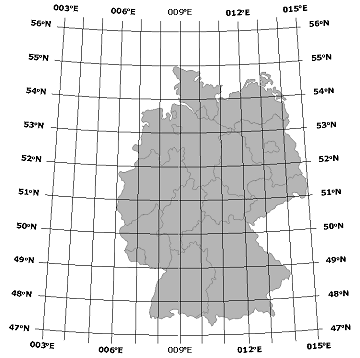

reference: http://www.digikaart.nl/deutschlandkarte-mit-langen-und-breitengraden.html

In [ ]:
%%sql sqlite:///data/prtr_en.db test_6 <<
    SELECT wgs84_x, wgs84_y, city, postcode, name
    FROM facilities 
    WHERE (wgs84_x < 6 AND wgs84_x > 15) AND (wgs84_y > 55 AND wgs84_y < 47) 
    GROUP BY city 
    ORDER BY wgs84_x, wgs84_y

In [ ]:
test_6

In [ ]:
# the method is not very precise, but it is possible to manually check the areas bordering Germany

### Quality check #7 - combination of coordinates is unique

In [ ]:
# the query should count the GROUP BY results and can thus display duplicate values

In [ ]:
%%sql sqlite:///data/prtr_en.db test_7 <<
    SELECT wgs84_x, wgs84_y, name, COUNT(*)
    FROM facilities
    GROUP BY wgs84_x, wgs84_y, name
    HAVING COUNT(*)>1 

In [ ]:
test_7

### Quality check #8 - Sanitize plant names

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_1 <<
    SELECT name from facilities
    WHERE name LIKE '%;%'

In [ ]:
test_8_1

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_1_replace_semicolon <<
    UPDATE facilities set name = replace(name, ';', '')

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_1 <<
    SELECT name from facilities
    WHERE name LIKE '%;%'

In [ ]:
# nothing should be returned after sanitazing
test_8_1

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_2 <<
    SELECT name from facilities
    WHERE name LIKE '%#%'

In [ ]:
test_8_2

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_3 <<
    SELECT name from facilities
    WHERE name LIKE '%$%'

In [ ]:
test_8_3

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_4 <<
    SELECT name from facilities
    WHERE name LIKE '%?%'

In [ ]:
test_8_4

In [ ]:
%%sql sqlite:///data/prtr_en.db test_8_4 <<
    SELECT name from facilities
    WHERE name LIKE '%%%'

### Quality check #09 - TSP > PM10 >PM2.5 >BC

In [ ]:
# there is no Black carbon (BC), no PM2.5 and no TSP in the database

### Quality check #10 - PM (Particulate Matter) > HM (Heavy Metals)

In [ ]:
%%sql sqlite:///data/prtr_en.db test_10_SUM_PM10 <<
    SELECT substance_name, SUM(annual_load) from releases
    WHERE substance_name = 'Particulate matter (PM10)' 

In [ ]:
test_10_SUM_PM10

In [ ]:
%%sql sqlite:///data/prtr_en.db test_10_SUM_Pb <<
    SELECT substance_name, SUM(annual_load) from releases
    WHERE substance_name = 'Lead and compounds (as Pb)' 

In [ ]:
test_10_SUM_Pb

In [ ]:
%%sql sqlite:///data/prtr_en.db test_10_SUM_Cd <<
    SELECT SUM(annual_load) from releases
    WHERE substance_name = 'Cadmium and compounds (as Cd)' 

In [ ]:
test_10_SUM_Cd

In [ ]:
%%sql sqlite:///data/prtr_en.db test_10_SUM_Hg <<
    SELECT SUM(annual_load) from releases
    WHERE substance_name = 'Mercury and compounds (as Hg)'

In [ ]:
test_10_SUM_Hg

### quality check 13 - general data validation checks like replacing 'O' with 0

In [ ]:
%%sql sqlite:///data/prtr_en.db test_13 <<
    SELECT id, facility_id, year, annual_load FROM releases
    WHERE annual_load LIKE 'O' OR id LIKE 'O' OR year LIKE 'O' OR annual_load LIKE 'O'

In [ ]:
# if the query returns no values, the test is passed

In [ ]:
test_13

### quality check 14 - for each LPS coordinates should be given

In [ ]:
%%sql sqlite:///data/prtr_en.db test_14 <<
    SELECT name, wgs84_x, wgs84_y FROM facilities
    WHERE wgs84_x = 0 OR wgs84_y = 0

In [ ]:
# if the query returns no values, the test is passed

In [ ]:
test_14